# Tweet Disaster Analysis


In [2]:
%pip install matplotlib
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install sklearn



Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.



Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# import torch
# from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
# from torch.utils.data import DataLoader, Dataset
# from transformers import BertTokenizer, BertModel
# import torch.nn as nn
# import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Train and Test Split


In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train_data.duplicated().sum()

np.int64(0)

In [8]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

## Data Analysis

This is to understand how the data is distributed and what spread of data


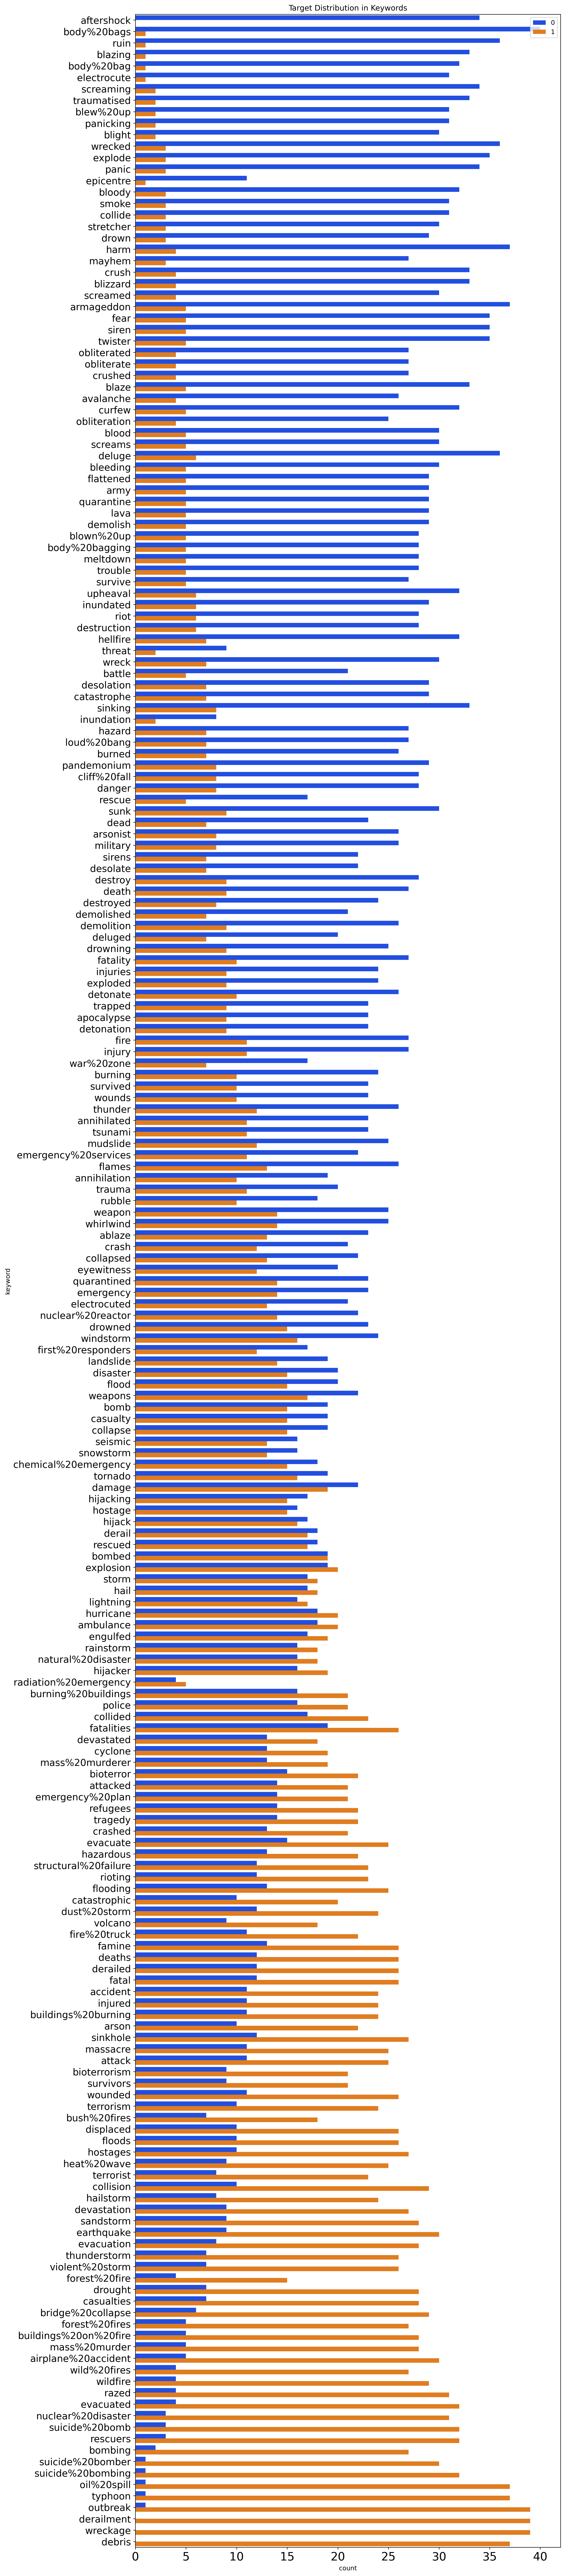

In [9]:
train_data['target_mean'] = train_data.groupby(
    'keyword')['target'].transform('mean')

figure = plt.figure(figsize=(12, 72), dpi=256)

sorted_train_data = train_data.sort_values(by='target_mean', ascending=True)

sns.countplot(y=sorted_train_data['keyword'],
              hue=sorted_train_data['target'], palette='bright')

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=15)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

C:\Users\prans\AppData\Local\Temp\ipykernel_30724\2602859013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_data['keyword'], order=train_data['keyword'].value_counts(


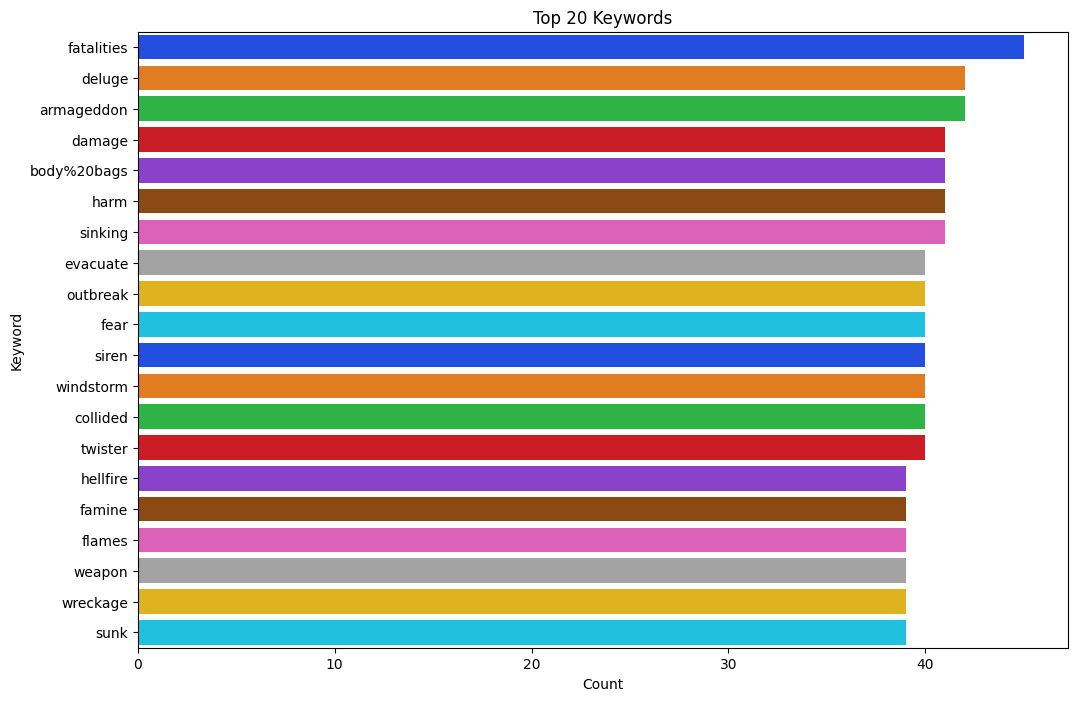

In [10]:
# We will not take all the keywords we will take only the top 20 keywords

plt.figure(figsize=(12, 8))
sns.countplot(y=train_data['keyword'], order=train_data['keyword'].value_counts(
).iloc[:20].index, palette='bright')
plt.title('Top 20 Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

In [11]:
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [12]:
stop_words = set(stopwords.words('english'))
train_data['text'] = train_data['text'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in stop_words]))

## Text Preprocessing


### Text Cleaning

In [13]:
import re
import string

In [14]:
def remove_url(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)


def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)


def remove_emoji(tweet):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

In [15]:
def special_characters(tweet):

    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"mÌ¼sica", "music", tweet)
    tweet = re.sub(r"donå«t", "do not", tweet)
    tweet = re.sub(r"didn`t", "did not", tweet)
    tweet = re.sub(r"i\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"i\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"i\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let us", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"that\x89Ûªs", "that is", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"here\x89Ûªs", "here is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"you\x89Ûªre", "you are", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"You\x89Ûªve", "You have", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"You\x89Ûªll", "You will", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"Ì©", "", tweet)

    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    return tweet



def remove_nonASCII(tweet):
    tweet = ''.join([x for x in tweet if x in string.printable])
    return tweet

In [16]:
def expand_contractions(tweet):

    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"i'M", "I am", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"you'd", "you would", tweet)
    tweet = re.sub(r"You'd", "You would", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"You've", "You have", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"You'll", "You will", tweet)
    tweet = re.sub(r"y'know", "you know", tweet)
    tweet = re.sub(r"Y'know", "You know", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"We'd", "We would", tweet)
    tweet = re.sub(r"WE'VE", "We have", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"We'll", "We will", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"They'd", "They would", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"They've", "They have", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"They'll", "They will", tweet)
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"He'll", "He will", tweet)
    tweet = re.sub(r"she's", "she is", tweet)
    tweet = re.sub(r"She's", "She is", tweet)
    tweet = re.sub(r"she'll", "she will", tweet)
    tweet = re.sub(r"She'll", "She will", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"It'll", "It will", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"Isn't", "Is not", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"Who's", "Who is", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"here's", "here is", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Where's", "Where is", tweet)
    tweet = re.sub(r"wHeRE's", "where is", tweet)
    tweet = re.sub(r"how's", "how is", tweet)
    tweet = re.sub(r"How's", "How is", tweet)
    tweet = re.sub(r"how're", "how are", tweet)
    tweet = re.sub(r"How're", "How are", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"DON'T", "Do not", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"DIDN'T", "Did not", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"would've", "would have", tweet)

    return tweet

In [17]:
def remove_non_alnum(tweet):
    punctuation = re.compile('[^A-Za-z0-9]+')
    return punctuation.sub(r' ', tweet)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)


def remove_extra_spaces(text):
    text = re.sub('\s+', ' ', text).strip()
    return text

In [18]:
def specific_corrections(tweet):

    tweet = re.sub(r"b/c", "because", tweet)
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/out", "without", tweet)
    tweet = re.sub(r"w/o", "without", tweet)
    tweet = re.sub(r"w/", "with ", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"c/o", "care of", tweet)
    tweet = re.sub(r"p/u", "pick up", tweet)
    tweet = re.sub(r"\n", " ", tweet)

    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    tweet = re.sub(r"Newss", "News", tweet)
    tweet = re.sub(r"remedyyyy", "remedy", tweet)
    tweet = re.sub(r"Bstrd", "bastard", tweet)
    tweet = re.sub(r"bldy", "bloody", tweet)
    tweet = re.sub(r"epicenterr", "epicenter", tweet)
    tweet = re.sub(r"approachng", "approaching", tweet)
    tweet = re.sub(r"evng", "evening", tweet)
    tweet = re.sub(r"Sumthng", "something", tweet)
    tweet = re.sub(r"kostumes", "costumes", tweet)
    tweet = re.sub(r"glowng", "glowing", tweet)
    tweet = re.sub(r"kindlng", "kindling", tweet)
    tweet = re.sub(r"riggd", "rigged", tweet)
    tweet = re.sub(r"HLPS", "helps", tweet)
    tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
    tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
    tweet = re.sub(r"Kowing", "Knowing", tweet)
    tweet = re.sub(r"wrld", "world", tweet)
    tweet = re.sub(r"shld", "should", tweet)
    tweet = re.sub(r"thruuu", "through", tweet)
    tweet = re.sub(r"probaly", "probably", tweet)
    tweet = re.sub(r"whatevs", "whatever", tweet)
    tweet = re.sub(r"colomr", "colour", tweet)
    tweet = re.sub(r"pileq", "pile", tweet)
    tweet = re.sub(r"firefightr", "firefighter", tweet)
    tweet = re.sub(r"LAIGHIGN", "laughing", tweet)
    tweet = re.sub(r"EXCLUSIV", "Exclusive", tweet)
    tweet = re.sub(r"belo-ooow", "below", tweet)
    tweet = re.sub(r"who-ooo-ole", "whole", tweet)
    tweet = re.sub(r"brother-n-law", "father-in-law", tweet)
    tweet = re.sub(r"referencereference", "reference", tweet)

    return tweet

In [19]:
def clean_others(tweet):

    tweet = re.sub(r"Dr\.", "Doctor", tweet)
    tweet = re.sub(r"f\. M\.O\.P\.", "featuring Mash Out Posse", tweet)
    tweet = re.sub(r"M\.O\.P\.", "Mash Out Posse", tweet)
    tweet = re.sub(r"M\.O\.P", "Mash Out Posse", tweet)
    tweet = re.sub(r"P\.O\.P\.E\.", "Pope", tweet)
    tweet = re.sub(r"S\.O\.S\.", "SOS", tweet)
    tweet = re.sub(r"s\.o\.s\.", "SOS", tweet)
    tweet = re.sub(r"Fire Co\.", "Fire Company", tweet)
    tweet = re.sub(r"Holt and Co\.", "Holt and Company", tweet)
    tweet = re.sub(r"roofing co\.", "roofing company", tweet)
    tweet = re.sub(r"Costa Co\.", "Costa County", tweet)
    tweet = re.sub(r"York Co\.", "York County", tweet)
    tweet = re.sub(r"Fairfax Co\.", "Fairfax County", tweet)
    tweet = re.sub(r"I\.S\.I\.S\.", "ISIS", tweet)
    tweet = re.sub(r"U\.N\.", "United Nations", tweet)
    tweet = re.sub(r"U\.S\.", "United States", tweet)
    tweet = re.sub(r"U\.S", "United States", tweet)
    tweet = re.sub(r"U\.s\.", "United States", tweet)
    tweet = re.sub(r"U\.s", "United States", tweet)
    tweet = re.sub(r"U-S\.", "United States", tweet)
    tweet = re.sub(r"U\.S National", "United States National", tweet)
    tweet = re.sub(r"LANCASTER N\.H\.", "Lancaster New Hampshire", tweet)
    tweet = re.sub(r"Manchester N\.H\.", "Manchester New Hampshire", tweet)

    return tweet

In [20]:
train_df = pd.read_csv('train.csv',
                       dtype={'id': np.int16, 'target': np.int8})
test_df = pd.read_csv(
    'test.csv', dtype={'id': np.int16})
train_df = train_df.drop(['location', 'keyword'], axis=1)
test_df = test_df.drop(['location', 'keyword'], axis=1)

In [21]:
from tqdm import tqdm_notebook

preprocessed_tweets_train = []

for tweet in tqdm_notebook(train_df['text'].values):
    tweet = remove_url(tweet)
    tweet = remove_html(tweet)
    tweet = remove_emoji(tweet)
    tweet = special_characters(tweet)
    tweet = remove_nonASCII(tweet)
    tweet = expand_contractions(tweet)
    tweet = specific_corrections(tweet)
    tweet = remove_html(tweet)
    tweet = clean_others(tweet)
    tweet = remove_punct(tweet)
    tweet = remove_non_alnum(tweet)
    tweet = remove_extra_spaces(tweet)
    preprocessed_tweets_train.append(tweet.strip())

# 前処理済みのツイートをデータフレームに反映
train_df['text'] = preprocessed_tweets_train

train_df.head()

C:\Users\prans\AppData\Local\Temp\ipykernel_30724\124326337.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tweet in tqdm_notebook(train_df['text'].values):


  0%|          | 0/7613 [00:00<?, ?it/s]

,id,text,target
0,1,Our Deeds are the Reason of this earthquake Ma...,1
1,4,Forest fire near La Ronge Sask Canada,1
2,5,All residents asked to shelter in place are be...,1
3,6,13000 people receive wildfires evacuation orde...,1
4,7,Just got sent this photo from Ruby Alaska as s...,1


In [22]:
preprocessed_tweets_test = []

for tweet in tqdm_notebook(test_df['text'].values):
    tweet = remove_url(tweet)
    tweet = remove_html(tweet)
    tweet = remove_emoji(tweet)
    tweet = special_characters(tweet)
    tweet = remove_nonASCII(tweet)
    tweet = expand_contractions(tweet)
    tweet = specific_corrections(tweet)
    tweet = remove_html(tweet)
    tweet = clean_others(tweet)
    tweet = remove_punct(tweet)
    tweet = remove_non_alnum(tweet)
    tweet = remove_extra_spaces(tweet)
    preprocessed_tweets_test.append(tweet.strip())

test_df['text'] = preprocessed_tweets_test

C:\Users\prans\AppData\Local\Temp\ipykernel_30724\2774459475.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tweet in tqdm_notebook(test_df['text'].values):


  0%|          | 0/3263 [00:00<?, ?it/s]

# Visualization

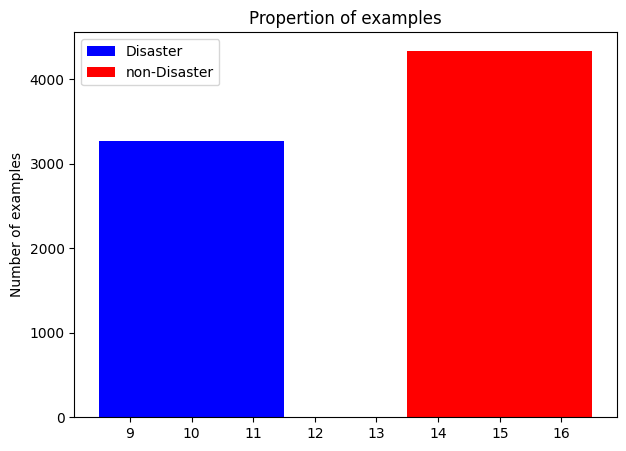

In [23]:
Real_len = train_df[train_df['target'] == 1].shape[0]
Not_len = train_df[train_df['target'] == 0].shape[0]

plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10, Real_len, 3, label="Disaster", color='blue')
plt.bar(15, Not_len, 3, label="non-Disaster", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

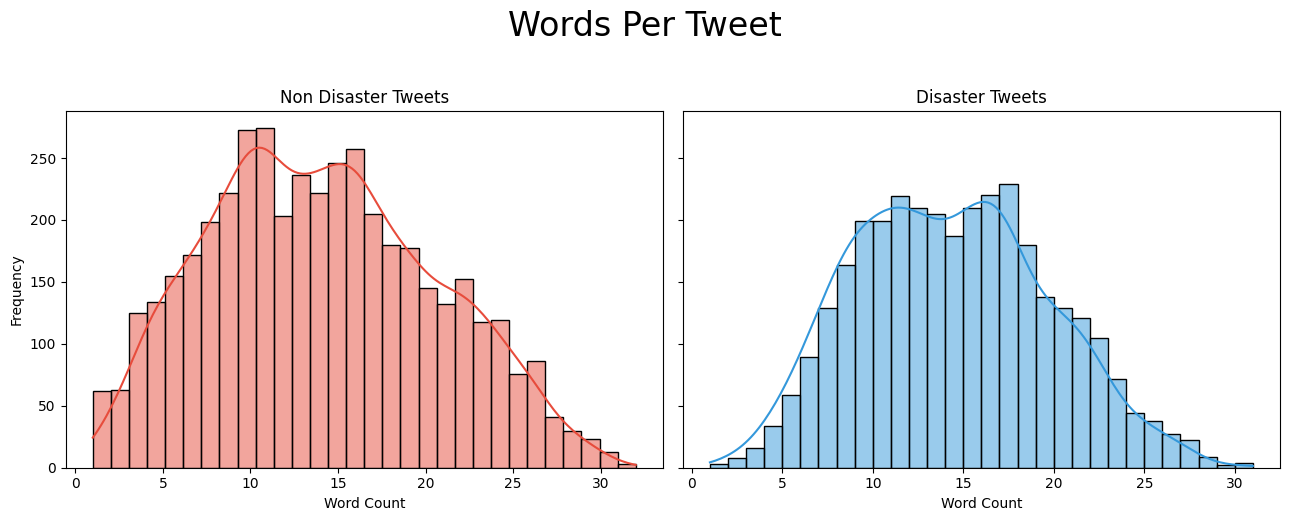

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_number_histogram(textno, textyes):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13, 5), sharey=True)
    sns.histplot(textno.str.split().map(lambda x: len(x)),
                 ax=axes[0], color='#e74c3c', kde=True, bins=30)
    sns.histplot(textyes.str.split().map(lambda x: len(x)),
                 ax=axes[1], color='#3498db', kde=True, bins=30)

    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Disaster Tweets')

    fig.suptitle('Words Per Tweet', fontsize=24, va='baseline')
    fig.tight_layout()
    plt.show()


textno = train_df[train_df['target'] == 0]['text']
textyes = train_df[train_df['target'] == 1]['text']
plot_word_number_histogram(textno, textyes)

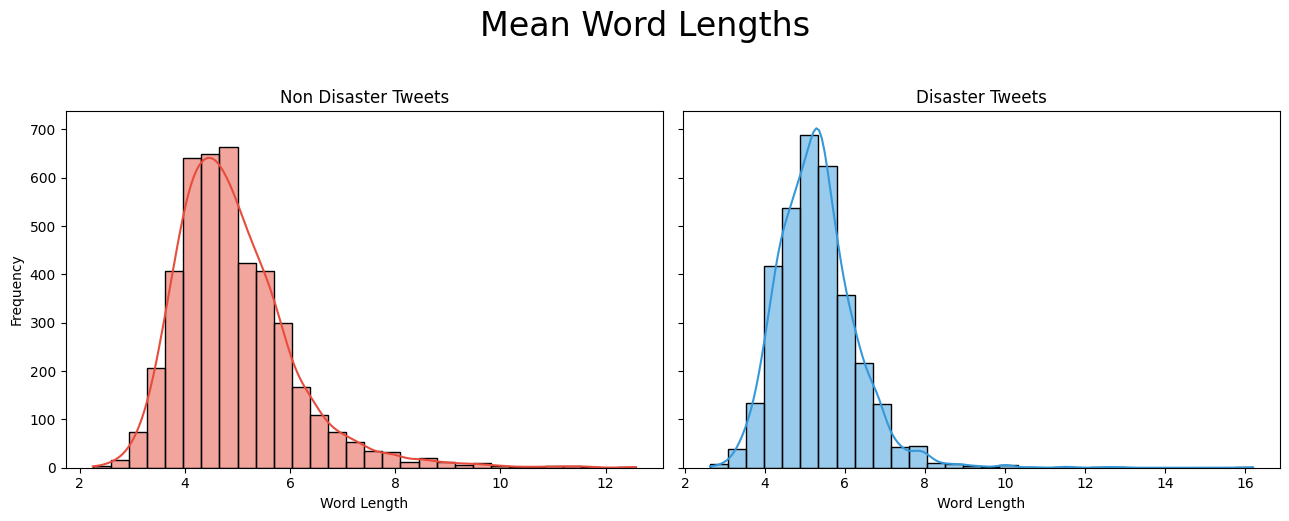

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



def plot_word_len_histogram(textno, textyes):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13, 5), sharey=True)

    textno_word_len = textno.str.split().apply(
        lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
    textyes_word_len = textyes.str.split().apply(
        lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
    sns.histplot(textno_word_len, ax=axes[0],
                 color='#e74c3c', kde=True, bins=30)
    sns.histplot(textyes_word_len,
                 ax=axes[1], color='#3498db', kde=True, bins=30)

    axes[0].set_xlabel('Word Length')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Length')
    axes[1].set_title('Disaster Tweets')

    fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
    fig.tight_layout()
    plt.show()

plot_word_len_histogram(train_df[train_df['target'] == 0]
                        ['text'], train_df[train_df['target'] == 1]['text'])

# Model Training


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform the training and testing data
X_train_tfidf = tfidf.fit_transform(train_df['text'])
X_val_tfidf = tfidf.transform(test_df['text'])

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
# val_tfidf = tfidf.transform(X_val)


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, solver='saga', random_state=42),
    # No significant complexity changes possible for Naive Bayes
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', C=100, tol=1e-6),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=5),
    # 'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=50, p=3),
    'Decision Tree': DecisionTreeClassifier(max_depth=None, min_samples_split=2),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=2000, random_state=42),
    'Extra Trees Classifier': ExtraTreesClassifier(n_estimators=1000, max_depth=None, random_state=42),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(max_iter=1000, tol=1e-6, random_state=42)
}

In [28]:
# To split data into training and testing sets
from sklearn.model_selection import train_test_split
# Train-test split
X = train_df['text']
y = train_df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform the training and testing data
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [30]:
predictions = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    predictions[name] = model.predict(X_val_tfidf)

In [31]:
# Evaluate each model by displaying f1 score
from sklearn.metrics import f1_score

# Collect accuracy scores and classification reports
results = {}
for name, y_pred in predictions.items():
    f1 = f1_score(y_val, y_pred)

    results[name] = {
        'f1_score': f1
    }

# Display results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"f1_score: {result['f1_score']:.4f}")
    print(' ')

Model: Logistic Regression
f1_score: 0.7462
 
Model: Naive Bayes
f1_score: 0.7474
 
Model: Random Forest
f1_score: 0.7100
 
Model: Support Vector Machine
f1_score: 0.7409
 
Model: Gradient Boosting
f1_score: 0.6273
 
Model: Decision Tree
f1_score: 0.6698
 
Model: Neural Network
f1_score: 0.6953
 
Model: Extra Trees Classifier
f1_score: 0.7358
 
Model: Passive Aggressive Classifier
f1_score: 0.6702
 


In [32]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [33]:
# test_data['text'] = test_data['text'].apply(preprocess_text)
test_vec = tfidf.transform(test_data['text'])
test_pred = model.predict(test_vec)

In [34]:
submission = pd.DataFrame({'id': test_data['id'], 'target': test_pred})
submission.to_csv('submission.csv', index=False)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [1],
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'max_iter': [1000]
}

# Initialize and fit GridSearchCV
grid_search_logreg = GridSearchCV(LogisticRegression(
), param_grid_logreg, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_logreg.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Logistic Regression Params: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


c:\Users\prans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\prans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\prans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\prans\AppData\Local\Programs\Python\Python310\lib\site-packa

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Parameter grid for SVM
param_grid_svm = {
    'C': [10],
    'kernel': ['rbf'],
    'gamma': ['scale']  # Only relevant for rbf and poly kernels
}

# Initialize and fit GridSearchCV
grid_search_svm = GridSearchCV(
    SVC(), param_grid_svm, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [37]:
from sklearn.metrics import accuracy_score, f1_score

# Use the best estimator to make predictions on the validation set
y_val_pred = grid_search_svm.best_estimator_.predict(X_val_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)

# Calculate F1 score (if you want to keep it consistent with your previous evaluations)
f1 = f1_score(y_val, y_val_pred)

# Print the results
print(f"Validation Accuracy of SVM: {accuracy:.4f}")
print(f"Validation F1 Score of SVM: {f1:.4f}")

Validation Accuracy of SVM: 0.7945
Validation F1 Score of SVM: 0.7424


In [52]:
# test_data['text'] = test_data['text'].apply(preprocess_text)
test_vec = tfidf.transform(test_data['text'])
test_svm_pred = grid_search_svm.best_estimator_.predict(test_vec)

In [53]:
submission = pd.DataFrame({'id': test_data['id'], 'target': test_svm_pred})
submission.to_csv('submission.csv', index=False)